In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15.0,7.0)

In [41]:
from sklearn.datasets import load_breast_cancer

In [42]:
cancer = load_breast_cancer()

In [43]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [44]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [45]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [46]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print(cancer_df.shape)
cancer_df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualisation

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
scaler.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
cancer_df_scaled = scaler.transform(cancer_df)  # use fit_transform()

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [51]:
# pca.fit(cancer_df_scaled)
# x_pca = pca.transform(cancer_df_scaled)  # or below code

In [52]:
x_pca = pca.fit_transform(cancer_df_scaled)

In [53]:
print(cancer_df_scaled.shape)
print(x_pca.shape)

(569, 30)
(569, 5)


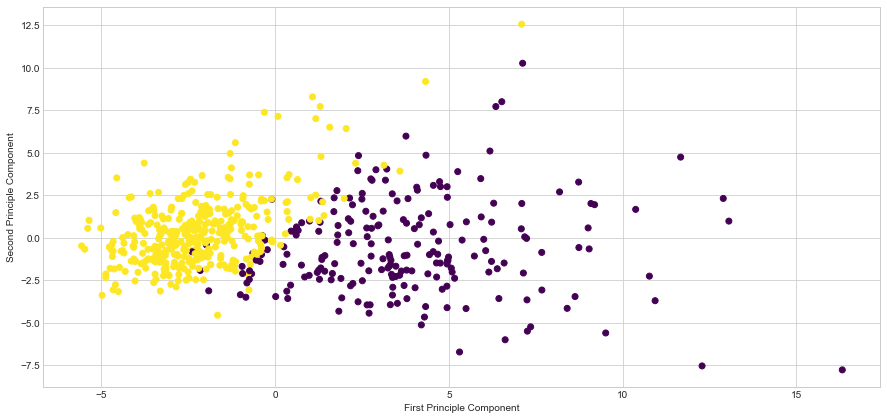

In [54]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='viridis')  #cmap = Blues_r
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

In [55]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853127,  0.06454991, -0.00931424,  0.02869949, -0.1042919 ,
        -0.07409155,  0.00273386, -0.02556353, -0

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer.feature_names)
print(df_comp.shape)
df_comp.head()

(5, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028699,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048546,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031794,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037787,-0.049469,0.037375,0.010332,-0.365089,0.011704,0.086375,-0.043861,-0.305942,-0.044424,...,-0.004407,-0.092884,0.007454,-0.027391,-0.324436,0.121804,0.188519,0.043332,-0.244558,0.094425


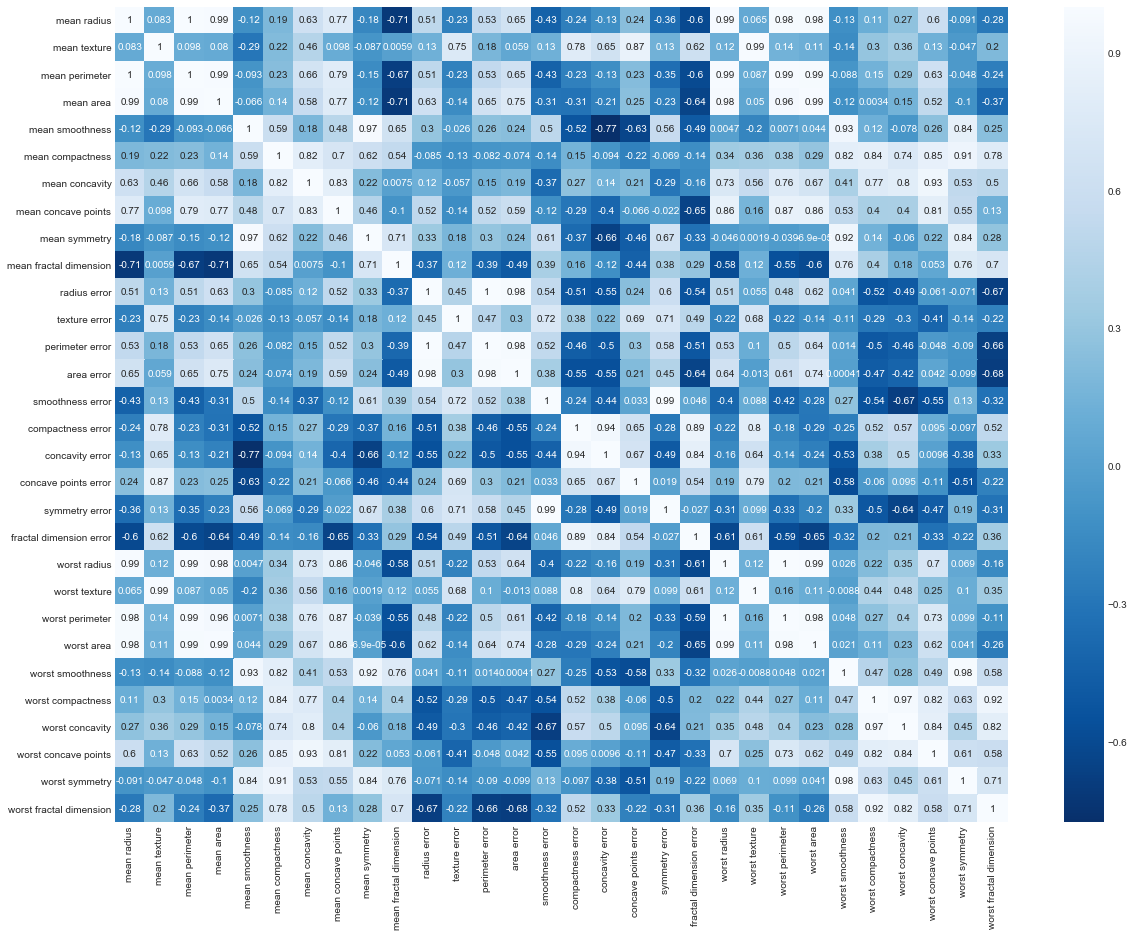

In [57]:
plt.rcParams['figure.figsize'] = (20.0,15.0)
sns.heatmap(df_comp.corr(),annot=True,cmap='Blues_r')

In [58]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324])

In [59]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [60]:
pc = ['PC1','PC2','PC3','PC4','PC5']
#pc = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']

<BarContainer object of 5 artists>

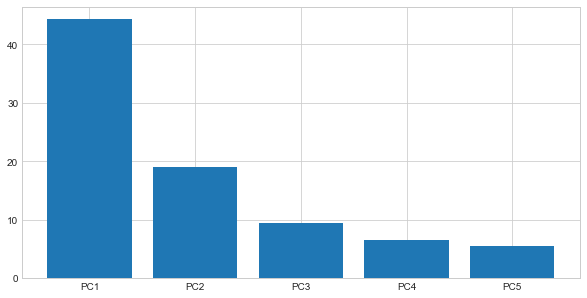

In [61]:
plt.rcParams['figure.figsize'] = (10.0,5.0)
plt.bar(pc,pca.explained_variance_ratio_*100) # X'ly by 100 for percentage

In [62]:
x_pca_df = pd.DataFrame(x_pca,columns=pc)
print(x_pca_df.shape)
x_pca_df.head()

(569, 5)


,PC1,PC2,PC3,PC4,PC5
0,9.192837,1.948583,-1.123165,3.633723,-1.195132
1,2.387802,-3.768172,-0.529296,1.118277,0.621809
2,5.733896,-1.075174,-0.551747,0.912082,-0.177088
3,7.122953,10.275589,-3.232793,0.152560,-2.960846
4,3.935302,-1.948072,1.389765,2.940645,0.546763


In [63]:
X = x_pca_df.values
y = cancer.target

In [64]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [68]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
y_pred_lm_train = lm.predict(X_train)

In [71]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_lm_train))

Accuracy_Score:  0.9824120603015075


In [72]:
y_pred_lm_test = lm.predict(X_test)

In [73]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_lm_test))

Accuracy_Score:  0.9590643274853801
